#Ungraded Lab: Beyond Hello World, A Computer Vision Example

I, Anish Anand continuing my journey of Neural Networks from coursera.

This is lab 2 and its more than hello world of ANN

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [ ]:
# Load the Fashion MNIST dataset
#look, instead of uploading such huge dataset we can directly fetch it with known location using 
fmnist = tf.keras.datasets.fashion_mnist

In [ ]:
fmnist.load_data()
#we have just used load data to load it from the server. It is not mandatory to do alone.Although , necessary.

4431872/4422102 [==============================] - 0s 0us/step


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [ ]:
# Load the training and test split of the Fashion MNIST dataset
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

Hold on , but we dont know anything about these data. Like in what format these data exist , so we will print them to know.
So we will use numpy array to print these data, how ? Dekhte han bhai , chilll maaro ! 

LABEL: 9

IMAGE PIXEL ARRAY:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1 

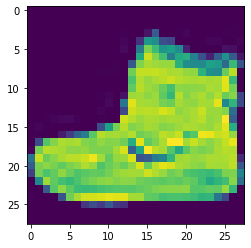

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# You can put between 0 to 59999 here
index = 0

# Set number of characters per row when printing
np.set_printoptions(linewidth=320)

# Print the label and image
print(f'LABEL: {training_labels[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n {training_images[index]}')

# Visualize the image
plt.imshow(training_images[index])

To bhai dekho, it is nothing but the image with label=9 is converted into image pixel and print function prints it.(Joota hai be )

One thing bro , You'll notice that all of the values in the number are between 0 and 255. If you are training a neural network especially in image processing, for various reasons it will usually learn better if you scale all values to between 0 and 1. It's a process called normalization and fortunately in Python, it's easy to normalize an array without looping. You do it like this:

So now we will normalize this by following codes.....

In [ ]:
# Normalize the pixel values of the train and test images
training_images  = training_images / 255.0
test_images = test_images / 255.0

#question sir: Why dividing with 250.0? 
#Answer sir : Because the highest value is 250.

In [ ]:
index = 0

# Set number of characters per row when printing
np.set_printoptions(linewidth=320)

# Print the label and image
print(f'LABEL: {training_labels[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n {training_images[index]}')

#this part can be skipped tooo or just hide it

LABEL: 9

IMAGE PIXEL ARRAY:
 [[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.

So far we have just knew that what kind of data is in the dataset, we represented them into array , now our work is to do nothing but dive into training our model.

Look Anish, jo hai wo dataset me hain , we just divided them into two parts called training set and testing set. We will use half of them for training and rest for testing ki bhai jo kiye ho wo sahi hai ya nhi !

In [ ]:
#building the model now

# classification model
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])


#ques Sir, What is Flatten?
#ques Sir,what is relu?
#ques Sir, what is softmax.nn n all?
# I am not getting anything 
# ruko zara sabar kro



**Sequential**: That defines a sequence of layers in the neural network.

**Flatten**: Remember earlier where our images were a 28x28 pixel matrix when you printed them out? Flatten just takes that square and turns it into a 1-dimensional array.

**Dense**: Adds a layer of neurons

Each layer of neurons need an activation function to tell them what to do. There are a lot of options, but just use these for now:

**ReLU** effectively means:

if x > 0: 
  return x

else: 
  return 0
In other words, it it only passes values 0 or greater to the next layer in the network.

**Softmax** takes a list of values and scales these so the sum of all elements will be equal to 1. When applied to model outputs, you can think of the scaled values as the probability for that class. For example, in your classification model which has 10 units in the output dense layer, having the highest value at index = 4 means that the model is most confident that the input clothing image is a coat. If it is at index = 5, then it is a sandal, and so forth. See the short code block below which demonstrates these concepts. You can also watch this lecture if you want to know more about the Softmax function and how the values are computed.

#What next bro !

The next thing to do, now that the model is defined, is to actually build it. You do this by compiling it with an optimizer and loss function as before -- and then you train it by calling model.fit() asking it to fit your training data to your training labels. It will figure out the relationship between the training data and its actual labels so in the future if you have inputs that looks like the training data, then it can predict what the label for that input is.

In [ ]:
#now its time to compile the model which we built 

model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

#the last epoch iteration will tell us how accurate your data is

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5006 - accuracy: 0.8240
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3712 - accuracy: 0.8653
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3359 - accuracy: 0.8771
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3112 - accuracy: 0.8857
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2945 - accuracy: 0.8906


So in my case the last accuracy value is 0.9108 which tell us that my model is 91% accurate. It means that 91% times it is telling the accurate desired output. Being an AI engineer it is not great but okay , there are many ways we can regulate it.

Accha, have uh thought anything for the missing data in dataset, while training the model took them too? Then it may possible it is affecting the accuracy of model. 

So lets first dig out about the missing , we will use evaluate() to know this.

In [ ]:
# Evaluate the model on unseen data
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3508 - accuracy: 0.8744


[0.3507882058620453, 0.8744000196456909]

You can expect the accuracy here to be about 0.88 which means it was 88% accurate on the entire test set. As expected, it probably would not do as well with unseen data as it did with data it was trained on! As you go through this course, you'll look at ways to improve this.

###Exercise 1:

For this first exercise run the below code: It creates a set of classifications for each of the test images, and then prints the first entry in the classifications. The output, after you run it is a list of numbers. Why do you think this is, and what do those numbers represent?

In [ ]:
classifications = model.predict(test_images)

print(classifications[0])

[7.5047225e-08 7.6409066e-09 2.5629154e-07 5.3427481e-08 2.3027191e-07 7.3196704e-04 5.0608276e-07 6.9662984e-03 3.9278325e-06 9.9229664e-01]


In [ ]:
print(test_labels[0])

9


***###E1Q1: What does this list represent?***

1) It's 10 random meaningless values

2) It's the first 10 classifications that the computer made

3) It's the probability that this item is each of the 10 classes
Click for Answer
#### Answer: The correct answer is (3) The output of the model is a list of 10 numbers. These numbers are a probability that the value being classified is the corresponding value (https://github.com/zalandoresearch/fashion-mnist#labels), i.e. the first value in the list is the probability that the image is of a '0' (T-shirt/top), the next is a '1' (Trouser) etc. Notice that they are all VERY LOW probabilities. For index 9 (Ankle boot), the probability was in the 90's, i.e. the neural network is telling us that the image is most likely an ankle boot.

***###E1Q2: How do you know that this list tells you that the item is an ankle boot?***

1) There's not enough information to answer that question

2) The 10th element on the list is the biggest, and the ankle boot is labelled 9

3) The ankle boot is label 9, and there are 0->9 elements in the list
Click for Answer
#### Answer The correct answer is (2). Both the list and the labels are 0 based, so the ankle boot having label 9 means that it is the 10th of the 10 classes. The list having the 10th element being the highest value means that the Neural Network has predicted that the item it is classifying is most likely an ankle boot

##Exercise 2:

Let's now look at the layers in your model. Experiment with different values for the dense layer with 512 neurons. What different results do you get for loss, training time etc? Why do you think that's the case?



In [ ]:
mnist = tf.keras.datasets.mnist
(training_images,training_labels),(test_images,test_labels) = mnist.load_data()

training_images=training_images/255.0
test_images=test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu), # Try experimenting with this layer
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(training_images,training_labels,epochs=5)
model.evaluate(test_images,test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

#actually we increase the 2nd layer value to 1024 from 128 and so the loss value come to drop.
# simply means that more neurons causing more accuracy, loss: 0.0260 is now and earlier it was loss: 0.3660 
#and so the accuracy from 86% goes to damn 97% which is pretty good

11501568/11490434 [==============================] - 0s 0us/step
Epoch 1/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1855 - accuracy: 0.9448
Epoch 2/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0738 - accuracy: 0.9771
Epoch 3/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0488 - accuracy: 0.9838
Epoch 4/5
1875/1875 [==============================] - 20s 10ms/step - loss: 0.0355 - accuracy: 0.9890
Epoch 5/5
313/313 [==============================] - 2s 5ms/step - loss: 0.0772 - accuracy: 0.9796
[1.0010096e-08 6.9404427e-10 4.7037993e-06 4.9561564e-05 1.8459493e-11 1.2175938e-08 2.4821277e-13 9.9994314e-01 3.0959040e-07 2.1641697e-06]
7


###E2Q1: Increase to 1024 Neurons -- What's the impact?
1)Training takes longer, but is more accurate

2)Training takes longer, but no impact on accuracy

3)Training takes the same time, but is more accurate
Click for Answer
#### Answer The correct answer is (1) by adding more Neurons we have to do more calculations, slowing down the process, but in this case they have a good impact -- we do get more accurate. That doesn't mean it's always a case of 'more is better', you can hit the law of diminishing returns very quickly!

##Exercise 3

Think about the case when we reomve the flatten layers, lets try it and observe the output.

In [ ]:
mnist = tf.keras.datasets.mnist

(training_images,training_labels),(test_images,test_labels) = mnist.load_data()

training_images=training_images/255.0
training_labels=training_labels/255.0


